# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NYC Manhattan - Data Processing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame

In [2]:
manhattan = pd.read_csv('manhattan_addr2.csv') 

## 1. Data Cleaning

## Drop attributes
- cmplnt_num
- cmplnt_fr_dt
- cmplnt_fr_tm
- crm_atpt_cptd_cd
- boro_nm
- parks_nm
- Number
- City
- State
- Country

In [3]:
attributes_to_drop = ['cmplnt_num', 'cmplnt_fr_dt', 'crm_atpt_cptd_cd', 'cmplnt_fr_tm', 'boro_nm', 
                      'parks_nm','Number', 'City', 'State', 'Country']
df = manhattan.drop(attributes_to_drop, axis = 1)

In [4]:
# Reemove nan in 'Zip'
df = df.dropna(subset=['Zip'])

In [5]:
df.groupby('Zip').count().index

Index(['10000', '10001', '10001-2062', '10002', '10003', '10004', '10005',
       '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014',
       '10016', '10017', '10018', '10019', '10021', '10022', '10023', '10024',
       '10025', '10025-4403', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038',
       '10039', '10040', '10044', '10045', '10048', '10055', '10065', '10069',
       '10075', '10111', '10115', '10128', '10129', '10153', '10169', '10174',
       '10280', '10281', '10282', '10451', '10452', '10453', '10454', '10457',
       '10461', '10463', '10465', '10466', '10473', '11101', '11103', '11201',
       '11204', '11206', '11208', '11210', '11212', '11216', '11220', '11222',
       '11231', '11354', '11369', '11370', '11372', '11373', '11375', '11385',
       '11417', '11418', '11432', '11434', '11691', '11693'],
      dtype='object', name='Zip')

In [6]:
# Replace zip code 
# 10001-2062 -> 10001
# 10025-4403 -> 10025
df['Zip'].replace('10001-2062', '10001', inplace=True)
df['Zip'].replace('10025-4403', '10025', inplace=True)

- Zip code above 10451 is not Manhattan
- 10451 Brox
- 10466 Brox
- 11101 Long Island

In [7]:
# Slice data frame (remove zip not in manhattan)
df = df[df["Zip"] < '10451']
manhattan_zip = list(df.groupby('Zip').count().index)
print(manhattan_zip)

['10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10044', '10045', '10048', '10055', '10065', '10069', '10075', '10111', '10115', '10128', '10129', '10153', '10169', '10174', '10280', '10281', '10282']


In [8]:
len(df['Zip'].unique())

55

## Law category
- "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
- "Misdemeanor" means an offense, other than a "traffic infraction, " for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
- "Violation" means an offense, other than a "traffic infraction", for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.

In [9]:
df['law_cat_cd'].unique()

array(['FELONY', 'MISDEMEANOR', 'VIOLATION'], dtype=object)

## Offense description

### - Rows to remove: ofns description total count < 1000

In [10]:
df['ofns_desc'].value_counts()[0:27]

PETIT LARCENY                     117840
GRAND LARCENY                      70155
HARRASSMENT 2                      63750
ASSAULT 3 & RELATED OFFENSES       48035
CRIMINAL MISCHIEF & RELATED OF     45405
DANGEROUS DRUGS                    21193
OFF. AGNST PUB ORD SENSBLTY &      20101
FELONY ASSAULT                     17564
BURGLARY                           13765
ROBBERY                            13464
MISCELLANEOUS PENAL LAW             8865
OFFENSES AGAINST PUBLIC ADMINI      8650
SEX CRIMES                          8308
DANGEROUS WEAPONS                   6929
THEFT-FRAUD                         5777
FORGERY                             5181
VEHICLE AND TRAFFIC LAWS            5127
CRIMINAL TRESPASS                   4305
GRAND LARCENY OF MOTOR VEHICLE      3931
FRAUDS                              3337
INTOXICATED & IMPAIRED DRIVING      3253
POSSESSION OF STOLEN PROPERTY       1812
OFFENSES INVOLVING FRAUD            1624
OTHER OFFENSES RELATED TO THEF      1613
RAPE            

In [11]:
index_to_remove = list(df['ofns_desc'].value_counts()[26:].index)
print(index_to_remove)

['UNAUTHORIZED USE OF A VEHICLE', 'THEFT OF SERVICES', 'ARSON', 'ADMINISTRATIVE CODE', "BURGLAR'S TOOLS", 'FRAUDULENT ACCOSTING', 'NYS LAWS-UNCLASSIFIED FELONY', 'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'KIDNAPPING & RELATED OFFENSES', 'JOSTLING', 'OFFENSES AGAINST PUBLIC SAFETY', 'PETIT LARCENY OF MOTOR VEHICLE', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'PROSTITUTION & RELATED OFFENSES', 'DISORDERLY CONDUCT', 'OFFENSES RELATED TO CHILDREN', 'ENDAN WELFARE INCOMP', 'OTHER STATE LAWS', 'CHILD ABANDONMENT/NON SUPPORT', 'LOITERING/GAMBLING (CARDS, DIC', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'ESCAPE 3', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'NEW YORK CITY HEALTH CODE', 'ANTICIPATORY OFFENSES', 'HOMICIDE-NEGLIGENT-VEHICLE', 'FELONY SEX CRIMES', 'INTOXICATED/IMPAIRED DRIVING', 'LOITERING', 'OTHER STATE LAWS (NON PENAL LAW)', 'DISRUPTION OF A RELIGIOUS SERV', 'KIDNAPPING', 'FORTUNE TELLING', 'UNLAWFUL POSS. WEAP. ON SCHOOL']


In [12]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["ofns_desc"] != desc]

In [13]:
len(df["ofns_desc"].value_counts())

26

In [14]:
df.shape

(502788, 21)

## Mahattan data (man_df.csv)
- Zip code cleaning
- Offense description cleaning

In [15]:
# Write to a csv file
df.to_csv("df_man.csv", index = False)

## 2. EDA

## Crime distribution by zip code

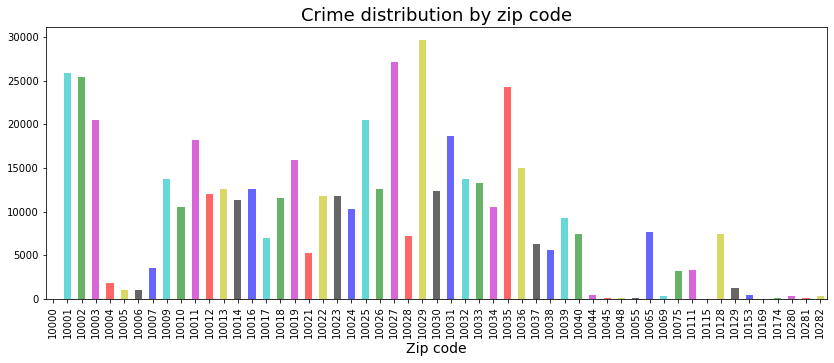

In [16]:
# Zip-code
fig = plt.figure(figsize = (14,5))
_ = df['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Crime distribution by zip code", fontsize=18)
_ = plt.xlabel('Zip code', fontsize = 14)

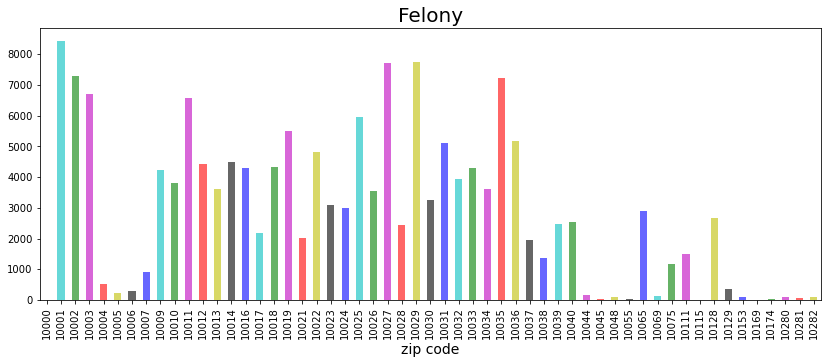

In [17]:
# Felony by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='FELONY']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Felony",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

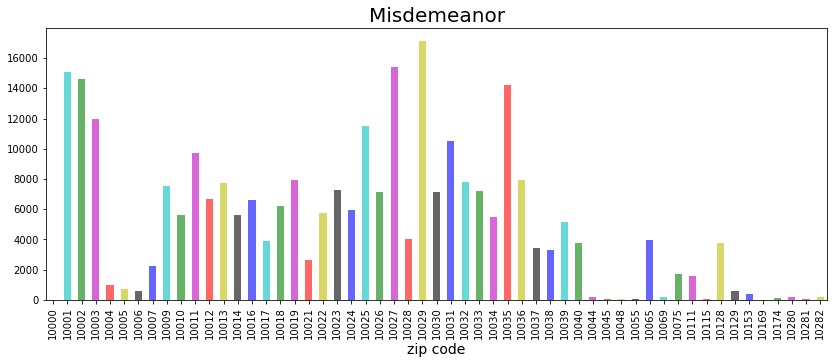

In [18]:
# MISDEMEANOR by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='MISDEMEANOR']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Misdemeanor",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

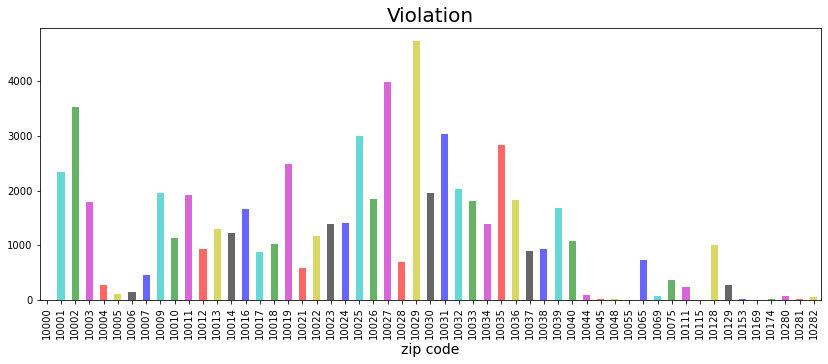

In [19]:
# Violation by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='VIOLATION']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Violation",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

## Make dataframe of "zip"-"law-cat-cd" with averaged lattitude and longitude

- Crosstab Zip & law_cat_cd

In [20]:
ctab_zip_law = pd.crosstab(df['Zip'],df['law_cat_cd'])

# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in manhattan_zip:    # manhattan_zip: zip list of Manhattan
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

df_zip_law = pd.DataFrame(dict(ctab_zip_law))
# Add total crime count for each zip code
df_zip_law['Crime'] = df_zip_law['FELONY']+df_zip_law['MISDEMEANOR']+df_zip_law['VIOLATION']

# Add lattitude and longitude of each zip location to dataframe
df_zip_law['zip'] = df_zip_law.index
df_zip_law = df_zip_law.reset_index(drop=True)
df_zip_law['latitude'] = loc_add['latitude']
df_zip_law['longitude'] = loc_add['longitude']
df_zip_law.head(5)

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,12,21,6,39,10000,40.712177,-74.005564
1,8432,15070,2338,25840,10001,40.749185,-73.992193
2,7293,14630,3532,25455,10002,40.716748,-73.987393
3,6705,11991,1785,20481,10003,40.732359,-73.989222
4,526,1000,267,1793,10004,40.703835,-74.012490


In [21]:
df_zip_law.shape

(55, 7)

In [22]:
# Write to a csv file
df_zip_law.to_csv("df_man_zip_law.csv", index = False)

## Crime count heatmap

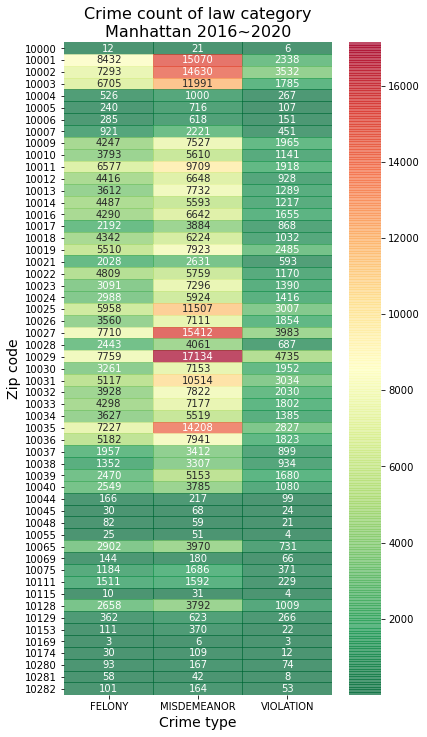

In [23]:
df_select = df_zip_law[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,12))
sns.heatmap(df_select, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count of law category\nManhattan 2016~2020', fontsize=16)
plt.show()

## Convert frequency to relative percentage of each law category

In [24]:
df_zip_law_pct = df_zip_law.copy()
df_zip_law_pct = df_zip_law_pct.drop('Crime', axis = 1)
df_zip_law_pct['FELONY'] = df_zip_law['FELONY']/df_zip_law['FELONY'].sum()*100
df_zip_law_pct['MISDEMEANOR'] = df_zip_law['MISDEMEANOR']/df_zip_law['MISDEMEANOR'].sum()*100
df_zip_law_pct['VIOLATION'] = df_zip_law['VIOLATION']/df_zip_law['VIOLATION'].sum()*100
df_zip_law_pct['Crime'] = df_zip_law['Crime']/df_zip_law['Crime'].sum()*100

df_zip_law_pct.head(5)

,FELONY,MISDEMEANOR,VIOLATION,zip,latitude,longitude,Crime
0,0.007563,0.007508,0.009315,10000,40.712177,-74.005564,0.007757
1,5.314375,5.387684,3.629758,10001,40.749185,-73.992193,5.139343
2,4.596506,5.230380,5.483450,10002,40.716748,-73.987393,5.062770
3,4.225911,4.286909,2.771223,10003,40.732359,-73.989222,4.073486
4,0.331518,0.357511,0.414519,10004,40.703835,-74.012490,0.356612


In [25]:
# Write to a csv file
df_zip_law_pct.to_csv("df_man_zip_law_pct.csv", index = False)

## Crime ratio heatmap

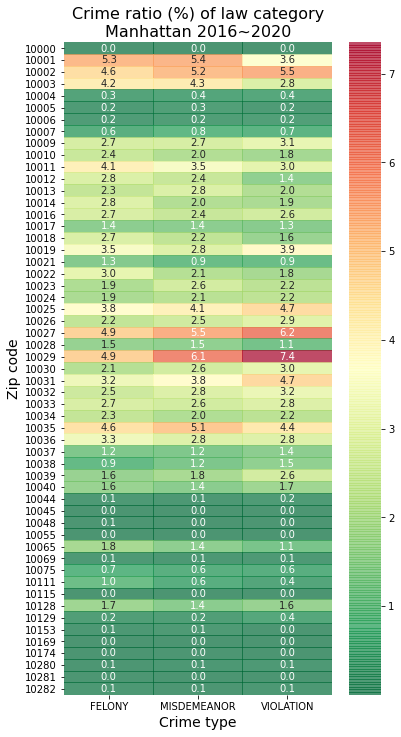

In [26]:
df_select = df_zip_law_pct[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,12))
sns.heatmap(df_select, annot=True, fmt='.1f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) of law category\nManhattan 2016~2020', fontsize=16)
plt.show()

## Crime heatmap on the Mahattan map

In [27]:
# plot_heatmap(category, data_file)
# prameter
#  category (string): crime category to plot 
#  data_file (dataframe): data to plot 
#     percentage distribution otherwise change colorbar label
def plot_heatmap(category, data_file):
    fig = plt.figure(figsize=(8,10))
    plt.scatter(data_file["longitude"],data_file["latitude"], 
                alpha = 0.8, s=100*data_file[category], marker='o',
                c= data_file[category], cmap='RdYlGn_r')
    title_string = category + ' (Manhattan)'
    plt.title(title_string, fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_manhattan.png")
    plt.imshow(ny_img, extent=[-74.04, -73.89, 40.68, 40.89], alpha=0.4)
    cbar.set_label("Percentage distribution in Zip code area", fontsize=12)
    plt.show()    

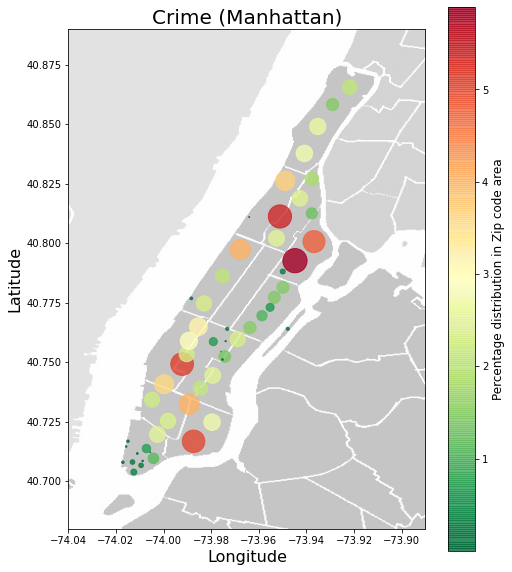

In [28]:
caterory = "Crime"
plot_heatmap(caterory, df_zip_law_pct)

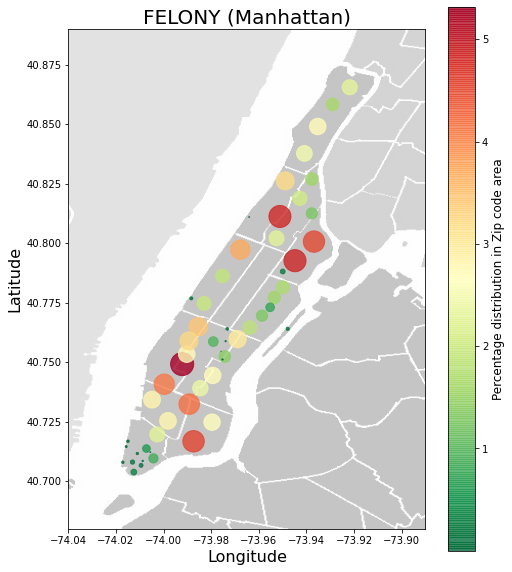

In [29]:
caterory = "FELONY"
plot_heatmap(caterory, df_zip_law_pct)

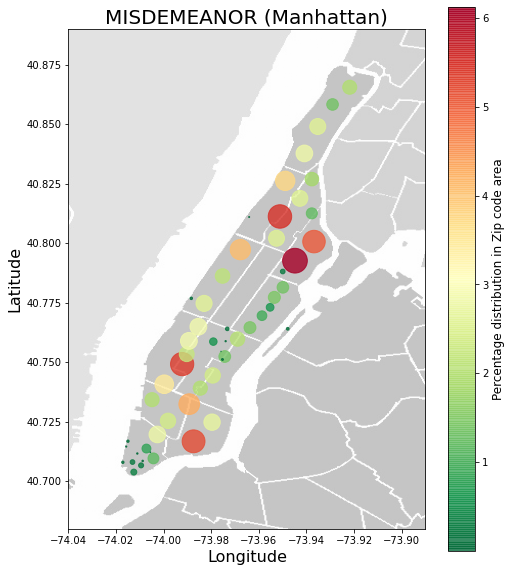

In [30]:
caterory = "MISDEMEANOR"
plot_heatmap(caterory, df_zip_law_pct)

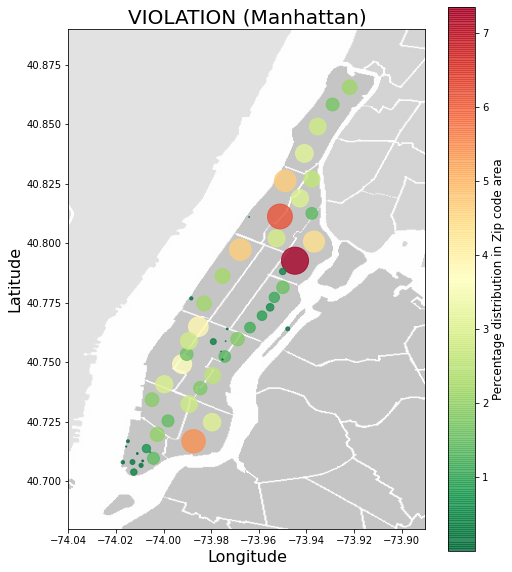

In [31]:
caterory = "VIOLATION"
plot_heatmap(caterory, df_zip_law_pct)

## Crosstab of Offense description and Zip code

In [32]:
# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in manhattan_zip:    # manhattan_zip: zip list of Manhattan
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

In [33]:
ctab_zip_ofns_desc = pd.crosstab(df['Zip'],df['ofns_desc'])

# Add lattitude and longitude of each zip location to dataframe
df_zip_ofns = pd.DataFrame(dict(ctab_zip_ofns_desc))
df_zip_ofns['zip'] = df_zip_ofns.index
df_zip_ofns = df_zip_ofns.reset_index(drop=True)
df_zip_ofns['latitude'] = loc_add['latitude']
df_zip_ofns['longitude'] = loc_add['longitude']
df_zip_ofns.head(5)

,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,FRAUDS,GRAND LARCENY,...,PETIT LARCENY,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,8,0,8,0,0,0,8,0,0,2,...,1,0,0,0,0,0,0,10000,40.712177,-74.005564
1,1977,633,1761,192,660,217,507,476,108,4982,...,9566,93,0,396,0,164,166,10001,40.749185,-73.992193
2,3535,626,2798,394,1058,321,1024,130,94,3069,...,4599,88,56,790,266,185,270,10002,40.716748,-73.987393
3,1513,658,1296,78,373,149,527,141,124,3922,...,7401,59,69,435,371,201,193,10003,40.732359,-73.989222
4,170,22,137,15,48,24,42,32,20,290,...,417,6,0,20,0,38,11,10004,40.703835,-74.012490


In [34]:
df_zip_ofns.shape

(55, 29)

In [35]:
# Write to a csv file
df_zip_ofns.to_csv("df_man_zip_ofns.csv", index = False)

## Convert frequency to relative percentage of each offense description

In [36]:
col_names = list(df_zip_ofns.keys())
print(col_names)

['ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON', 'OFFENSES INVOLVING FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'RAPE', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'VEHICLE AND TRAFFIC LAWS', 'zip', 'latitude', 'longitude']


In [37]:
df_zip_ofns_pct = df_zip_ofns.copy()
for index in col_names[:-3]:
    column = df_zip_ofns_pct[index]
    df_zip_ofns_pct[index] = column/column.sum()*100
df_zip_ofns_pct.head(3)

,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,FRAUDS,GRAND LARCENY,...,PETIT LARCENY,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,0.016655,0.000000,0.017619,0.000000,0.000000,0.000000,0.045548,0.000000,0.000000,0.002851,...,0.000849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000,40.712177,-74.005564
1,4.115749,4.598620,3.878427,4.459930,3.114236,3.131765,2.886586,9.187416,3.236440,7.101418,...,8.117787,5.132450,0.000000,2.941176,0.000000,2.838844,3.237761,10001,40.749185,-73.992193
2,7.359217,4.547766,6.162317,9.152149,4.992214,4.632703,5.830107,2.509168,2.816901,4.374599,...,3.902749,4.856512,3.994294,5.867499,3.201733,3.202354,5.266238,10002,40.716748,-73.987393


In [38]:
df_zip_ofns_pct.shape

(55, 29)

In [39]:
# Write to a csv file
df_zip_ofns_pct.to_csv("df_man_zip_ofns_pct.csv", index = False)

In [40]:
col_names[-3]

'zip'

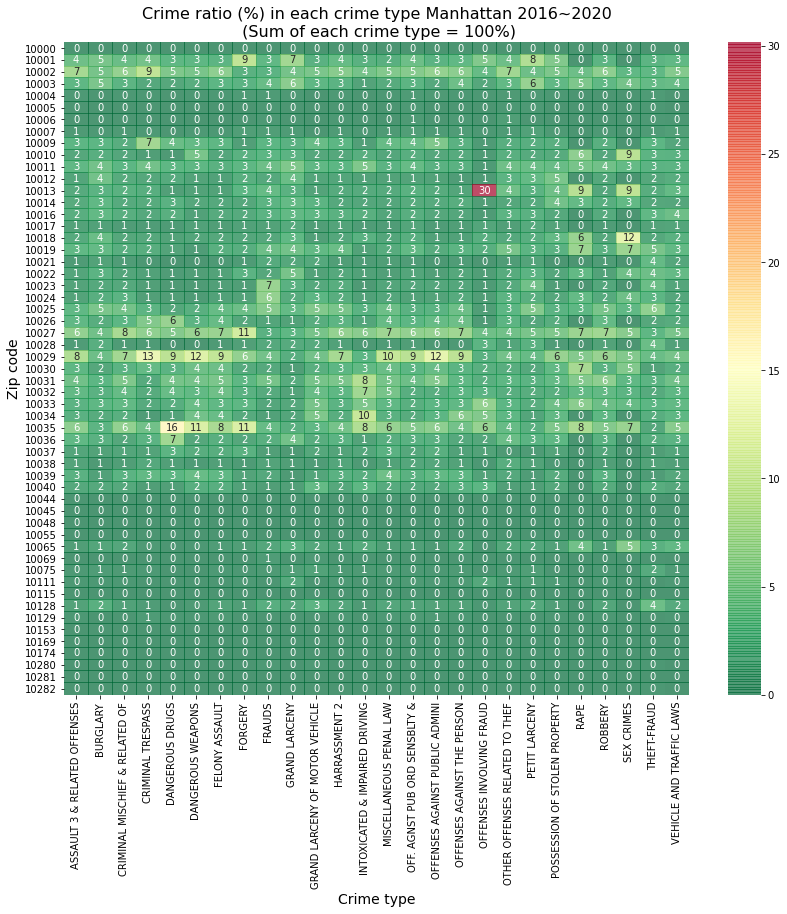

In [41]:
df2_plot = df_zip_ofns_pct[[x for x in col_names[0:-2]]]
df2_plot = df2_plot.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(14,12))
sns.heatmap(df2_plot, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) in each crime type Manhattan 2016~2020\n (Sum of each crime type = 100%)', fontsize=16)
plt.show()

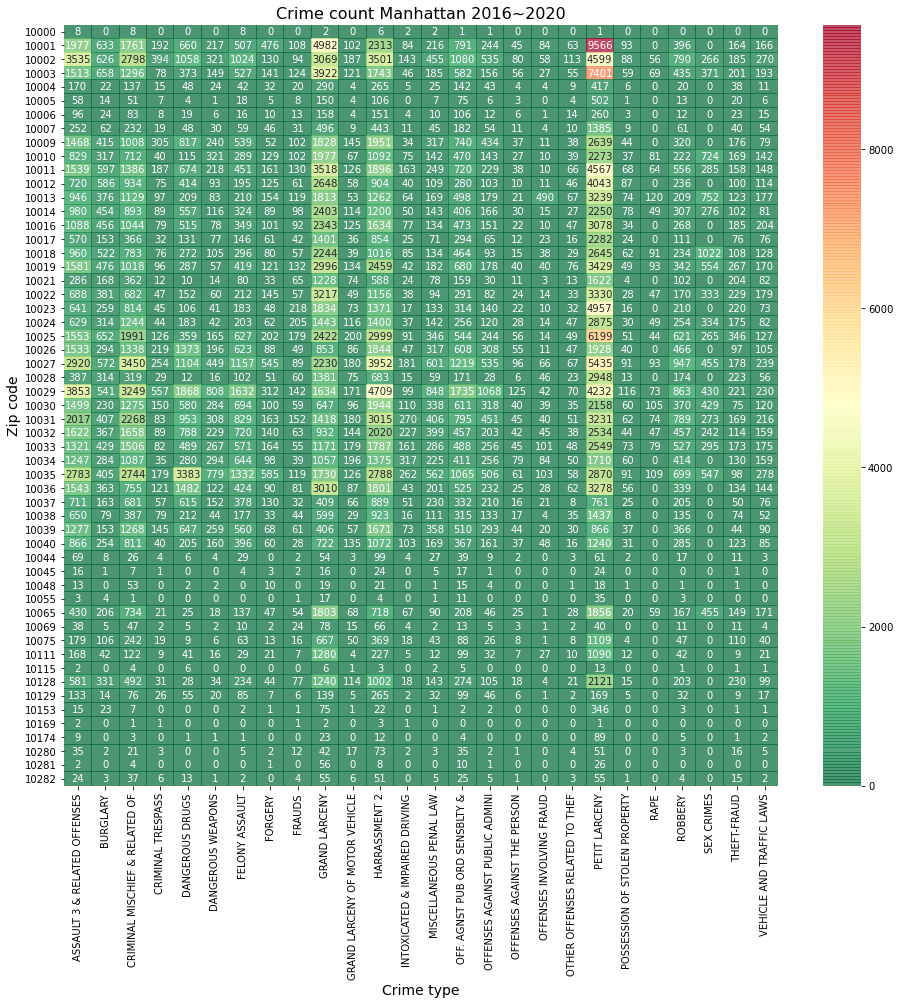

In [42]:
df2_plot2 = df_zip_ofns[[x for x in col_names[0:-2]]]
df2_plot2 = df2_plot2.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(16,14))
sns.heatmap(df2_plot2, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count Manhattan 2016~2020', fontsize=16)
plt.show()

## Plot by crime type

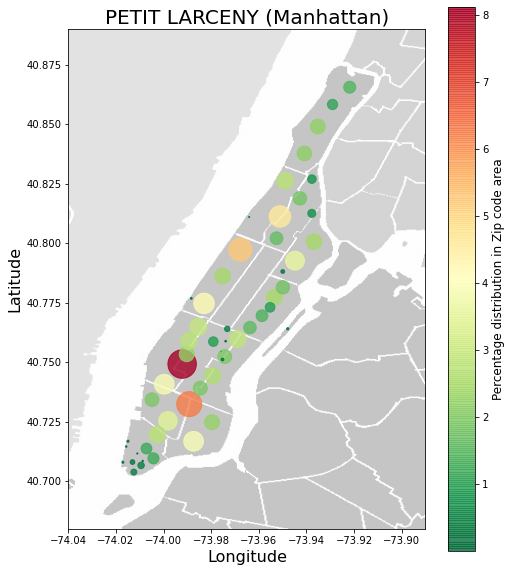

In [43]:
caterory = "PETIT LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

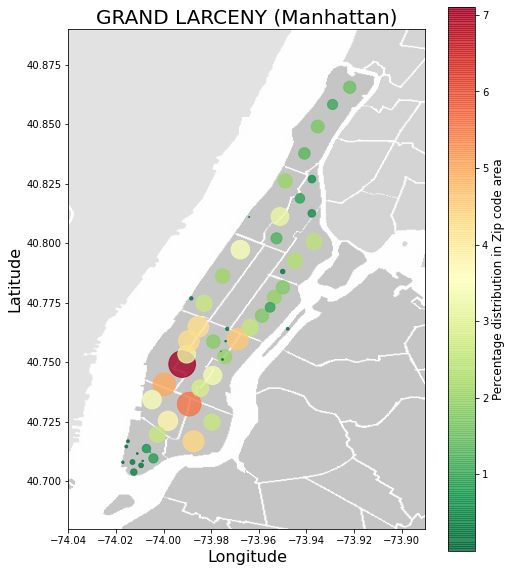

In [44]:
caterory = "GRAND LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

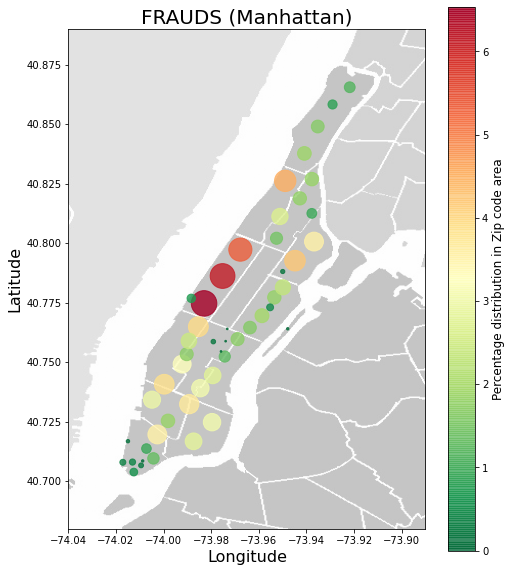

In [45]:
caterory = "FRAUDS"
plot_heatmap(caterory, df_zip_ofns_pct)

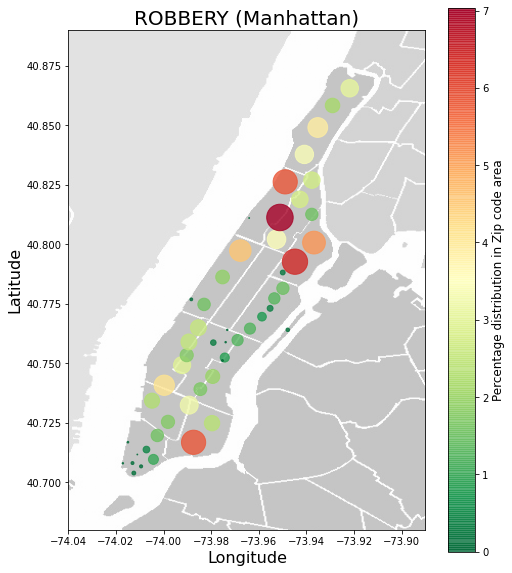

In [46]:
caterory = "ROBBERY"
plot_heatmap(caterory, df_zip_ofns_pct)

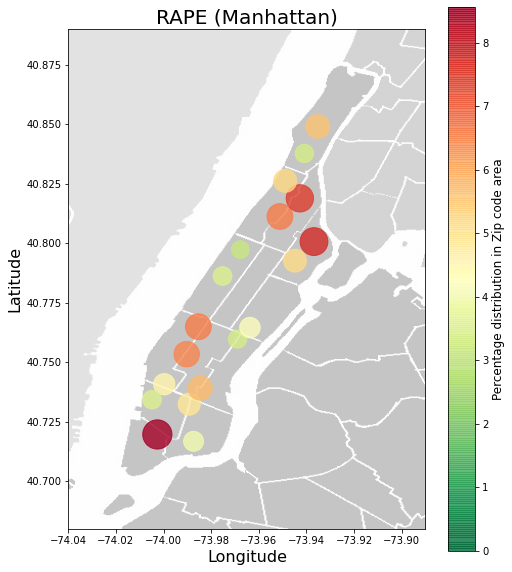

In [47]:
caterory = "RAPE"
plot_heatmap(caterory, df_zip_ofns_pct)

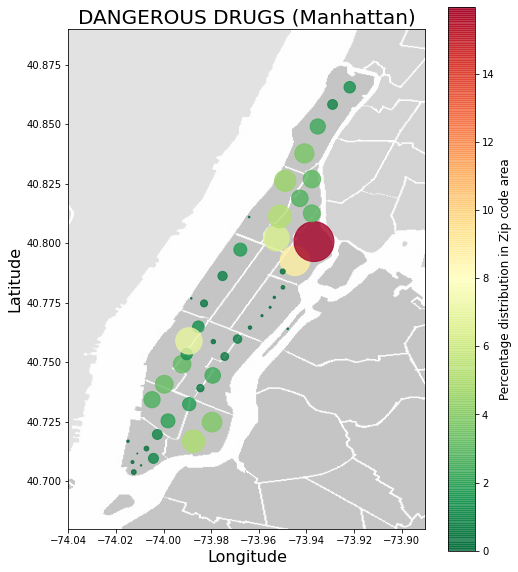

In [48]:
caterory = "DANGEROUS DRUGS"
plot_heatmap(caterory, df_zip_ofns_pct)